# Model Selection - Example

## Example Model
Measurement data are simulation results with the "true" model. The comprehensive model includes additional behaviour involving a third parameter. Hence, during model selection, models with $\theta_3=0$ should be preferred.

![](model_selection_network.jpeg)


# Model Space Specifications File

The model selection specification file can be written in the following compressed format.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | 0;estimate  |

Alternatively, models can be explicitly specified. The below table is equivalent to the above table.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1_0	| example_modelSelection.yaml	| 0	  | 0   |	0 | 
| M1_1	| example_modelSelection.yaml	| 0	  | 0	| estimate |
| M1_2	| example_modelSelection.yaml	| 0	  | estimate |	0 |
| M1_3	| example_modelSelection.yaml	| estimate |	0	| 0 |
| M1_4	| example_modelSelection.yaml	| 0	  | estimate |	estimate |
| M1_5	| example_modelSelection.yaml	| estimate |	0   |	estimate |
| M1_6	| example_modelSelection.yaml	| estimate |	estimate |	0 |
| M1_7	| example_modelSelection.yaml	| estimate | estimate |	estimate |

Either of the above tables (as [.tsv](https://en.wikipedia.org/wiki/Tab-separated_values) files) are valid inputs. Any combinations of cells in the compressed or explicit format is also acceptable, including the following example.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | 0  |
| M2      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | estimate  |

Internally, estimated parameters (`estimate`) are represented by `float('nan')`.

Due to the topology of the example model, setting $\theta_1$ to zero can result in a model with no dynamics. Hence, for this example, some parameters are set to non-zero fixed values. These parameters are not considered as estimated values in criterion (e.g. AIC) calculations.

The model specification table used in this notebook is copied below.

| model_id | petab_yaml                  | k1       | k2       | k3       |
|----------|-----------------------------|----------|----------|----------|
| M1_0     | example_modelSelection.yaml | 0        | 0        | 0        |
| M1_1     | example_modelSelection.yaml | 0.2      | 0.1      | estimate |
| M1_2     | example_modelSelection.yaml | 0.2      | estimate | 0        |
| M1_3     | example_modelSelection.yaml | estimate | 0.1      | 0        |
| M1_4     | example_modelSelection.yaml | 0.2      | estimate | estimate |
| M1_5     | example_modelSelection.yaml | estimate | 0.1      | estimate |
| M1_6     | example_modelSelection.yaml | estimate | estimate | 0        |
| M1_7     | example_modelSelection.yaml | estimate | estimate | estimate |

# Forward Selection, Multiple Searches
Here, we show a typical workflow for model selection. First, a [PEtab Select](https://github.com/petab-dev/petab_select) problem is created, which is used to initialize a pyPESTO model selection problem.

In [1]:
import pypesto.select
import petab_select
from petab_select import Criterion, Method, ESTIMATE
petab_select_problem = petab_select.Problem.from_yaml('model_selection/petab_select_problem.yaml')


# Helpers for plotting
def get_labels(models):
    labels = {
        model.get_hash(): str(model.model_subspace_id)
        for model in models
    }
    return labels


def get_digraph_labels(models, criterion):
    zero = min(model.get_criterion(criterion) for model in models)
    labels = {
        model.get_hash(): f'{model.model_subspace_id}\n{model.get_criterion(criterion) - zero:.2f}'
        for model in models
    }
    return labels

In [2]:
import logging
import pypesto.logging
pypesto.logging.log(level=logging.INFO, name='pypesto.select', console=True)
import petab

pypesto_select_problem_1 = pypesto.select.Problem(petab_select_problem=petab_select_problem)

Models can be selected with a model selection algorithm (here: [forward](https://en.wikipedia.org/wiki/Stepwise_regression)) and a comparison criterion (here: [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)). The forward method involves iterations where each iteration tests all models with one additional estimated parameter.

As no initial model is specified here, a virtual initial model with no estimated parameters is automatically used to find the "smallest" (in terms of number of estimated parameters) models. In this example, this is the model `M1_0`, which has no estimated parameters.

In [3]:
# Reduce notebook runtime 
minimize_options = {
    'n_starts': 1,
}

best_model_1, _, _ = pypesto_select_problem_1.select(
    method=Method.FORWARD,
    criterion=Criterion.AIC,
    minimize_options=minimize_options,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00,  5.53it/s]
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.AIC	36.975	None	None	True
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.AIC	36.975	None	None	True


To search more of the model space, the algorithm can be repeated. As models with no estimated parameters have already been tested, subsequent `select` calls will begin with the next simplest model (in this case, models with exactly 1 estimated parameters, if they exist in the model space), and move on to more complex models.

The best model from the first iteration is supplied as the predecessor (initial) model here.

In [4]:
best_model_2, _, _ = pypesto_select_problem_1.select(
    method=Method.FORWARD,
    criterion=Criterion.AIC,                                                                         
    minimize_options=minimize_options,
    predecessor_model=best_model_1,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00, 10.24it/s]
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	Criterion.AIC	-4.175	36.975	-41.151	True
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	649bcd92d8da15883a6709f3233e277e173aa6ce

Plotting routines are available, to visualize the best model at each iteration of the selection process, or to visualize the graph of models that have been visited in the model space.

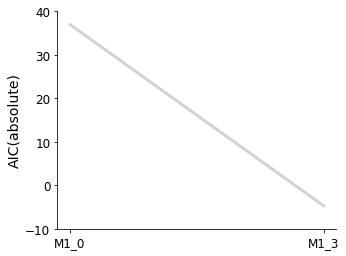

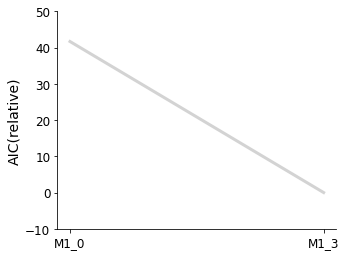

In [5]:
import pypesto.visualize.select as pvs
selected_models = [best_model_1, best_model_2]
ax = pvs.plot_selected_models(
    [best_model_1, best_model_2],
    criterion=Criterion.AIC,
    relative=False,
    labels=get_labels(selected_models),
)
ax = pvs.plot_selected_models(
    [best_model_1, best_model_2],
    criterion=Criterion.AIC,
    labels=get_labels(selected_models),
)
ax.plot();

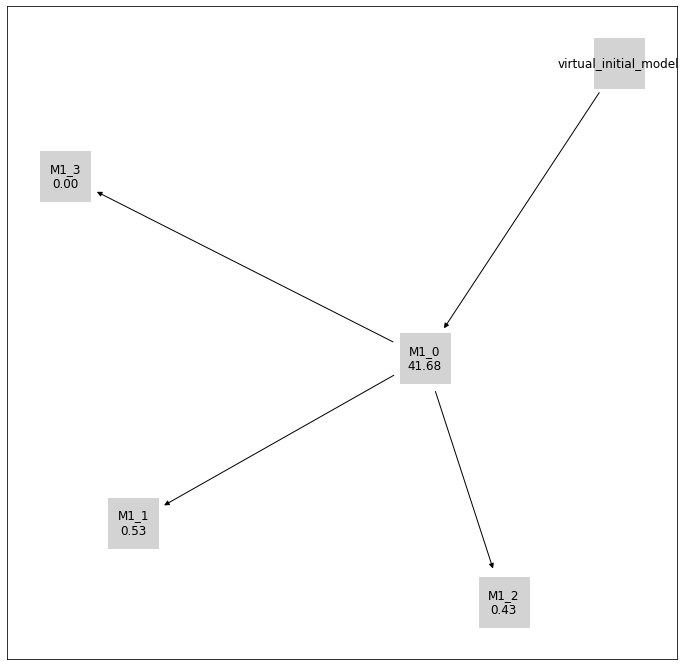

In [6]:
pvs.plot_history_digraph(
    problem=pypesto_select_problem_1,
    labels=get_digraph_labels(pypesto_select_problem_1.history.values(), criterion=Criterion.AIC),
)

# Backward Selection, Custom Initial Model
Backward selection is specified by changing the algorithm from `Method.FORWARD` to `Method.BACKWARD`in the `select()` call.

A custom initial model is specified with the optional `predecessor_model` argument of `select()`.

In [7]:
from pprint import pprint
import numpy as np
from petab_select import Model

petab_select_problem.model_space.reset_exclusions()
pypesto_select_problem_2 = pypesto.select.Problem(petab_select_problem=petab_select_problem)

petab_yaml = 'model_selection/example_modelSelection.yaml'
initial_model = Model(
    model_id='myModel',
    petab_yaml=petab_yaml,
    parameters=dict(
        k1=0.1,
        k2=ESTIMATE,
        k3=ESTIMATE,
    ),
    criteria={petab_select_problem.criterion: np.inf}
)

print('Initial model:')
print(initial_model)

Initial model:
model_id	petab_yaml	k1	k2	k3
myModel	model_selection/example_modelSelection.yaml	0.1	estimate	estimate


In [8]:
pypesto_select_problem_2.select(
    method=Method.BACKWARD,
    criterion=Criterion.AIC,
    predecessor_model=initial_model,    
    minimize_options=minimize_options,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00,  3.85it/s]
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	30c8abae7eebc8c9a6f363a7384bf743ac86177266f50d98a7c3cac043614c5f7076f8347cfd44a2d878702a5690784304682a9ef6cf5b89442a4e10bb2297bb	Criterion.AIC	38.975	inf	-inf	True
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	30c8abae7eebc8c9a6f363a7384bf743ac86177266f50d

(<petab_select.model.Model at 0x7f58d86d80d0>,
 {'9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812': <petab_select.model.Model at 0x7f58d86bbbe0>,
  'c77336267040331cfda996cb87b318896972a65038354bf1da57e5286b952ef2ab85621ad993cfc577453ad8196fc7be5aedf04f71fcf9514285afedf46cb1eb': <petab_select.model.Model at 0x7f58d86d80d0>},
 {'9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812': <petab_select.model.Model at 0x7f58d86bbbe0>,
  'c77336267040331cfda996cb87b318896972a65038354bf1da57e5286b952ef2ab85621ad993cfc577453ad8196fc7be5aedf04f71fcf9514285afedf46cb1eb': <petab_select.model.Model at 0x7f58d86d80d0>})

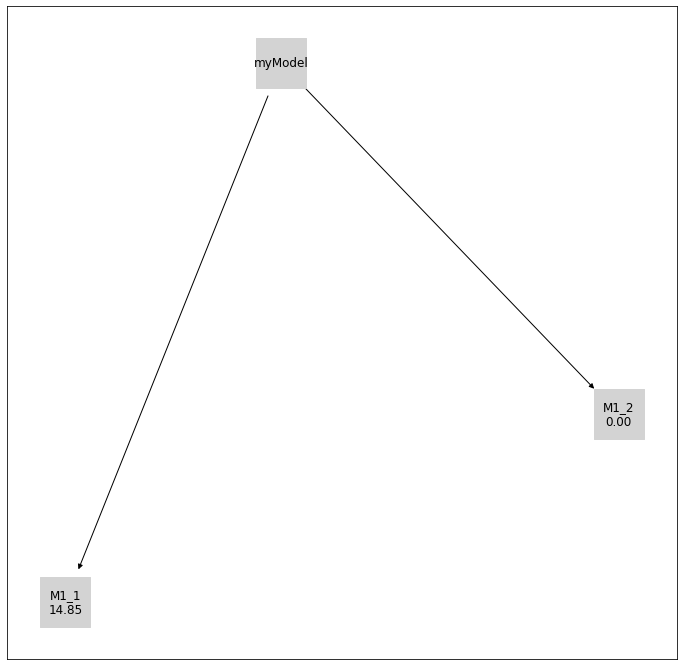

In [9]:
initial_model_label = {
    initial_model.get_hash(): initial_model.model_id
}

pvs.plot_history_digraph(
    problem=pypesto_select_problem_2,
    labels={
        **get_digraph_labels(pypesto_select_problem_2.history.values(), criterion=Criterion.AIC),
        **initial_model_label,
    },
)

# Additional Options
There exist additional options that can be used to further customise selection algorithms.
## Select First Improvement
At each selection step, as soon as a model that improves on the previous model is encountered (by the specified criterion), it is selected and immediately used as the previous model in the next iteration of the selection. This is unlike the default behaviour, where all test models at each iteration are optimized, and the best of these is selected.
## Use Previous Maximum Likelihood Estimate as Startpoint
The maximum likelihood estimate parameters from the previous model is used as one of the startpoints in the multistart optimization of the test models. The default behaviour is that all startpoints are automatically generated by pyPESTO.
## Minimize Options
Optimization can be customised with a dictionary that specifies values for the corresponding keyword arguments of [minimize](https://github.com/ICB-DCM/pyPESTO/blob/master/pypesto/optimize/optimize.py).
## Criterion Options
Currently implemented options are: `Criterion.AIC` ([Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)), `Criterion.AICC` ([corrected AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)), and `Criterion.BIC` ([Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)).
### Criterion Threshold
A threshold can be specified, such that only models that improve on previous models by the threshold amount in the chosen criterion are accepted.

In [10]:
petab_select_problem.model_space.reset_exclusions()
pypesto_select_problem_3 = pypesto.select.Problem(petab_select_problem=petab_select_problem)
best_models = pypesto_select_problem_3.select_to_completion(
    method=Method.FORWARD,
    criterion=Criterion.BIC,
    select_first_improvement=True,
    startpoint_latest_mle=True,    
    minimize_options=minimize_options,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.BIC	36.921	None	None	True
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.BIC	36.921	None	None	True
--------------------New Selection--------------------
--------------------New Selection-------

<AxesSubplot:ylabel='BIC(relative)'>

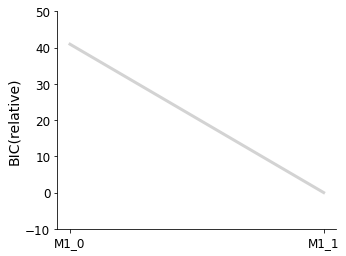

In [11]:
pvs.plot_selected_models(
    selected_models=best_models,
    criterion=Criterion.BIC,
    labels=get_labels(best_models),
)

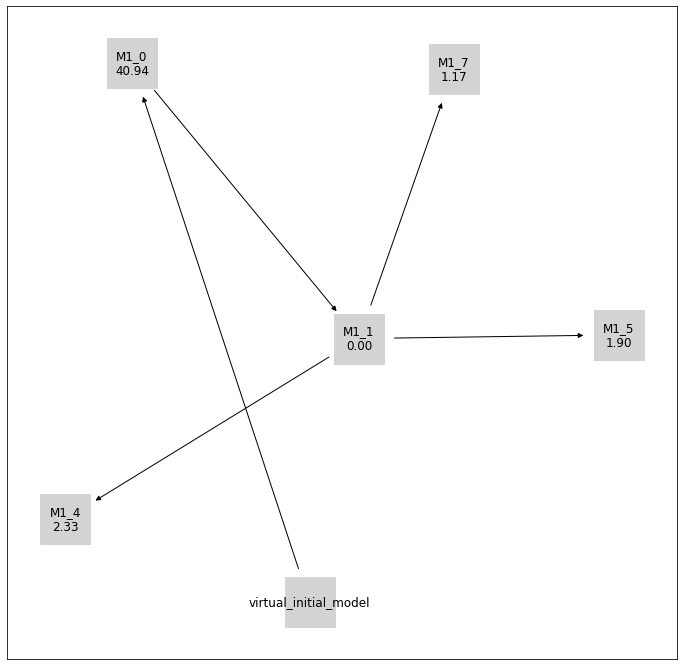

In [12]:
pvs.plot_history_digraph(
    problem=pypesto_select_problem_3,
    criterion=Criterion.BIC,
    relative=False,
    labels=get_digraph_labels(pypesto_select_problem_3.history.values(), criterion=Criterion.BIC),
)

In [13]:
# Repeat with AICc and criterion_threshold == 10
petab_select_problem.model_space.reset_exclusions()
pypesto_select_problem_4 = pypesto.select.Problem(petab_select_problem=petab_select_problem)
best_models = pypesto_select_problem_4.select_to_completion(
    method=Method.FORWARD,
    criterion=Criterion.AICC,
    select_first_improvement=True,
    startpoint_latest_mle=True,
    minimize_options=minimize_options,    
    criterion_threshold=10,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00,  8.16it/s]
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.AICC	37.775	None	None	True
649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	virtual_initial_model	Criterion.AICC	37.775	None	None	True
--------------------New Selection--------------------
--------------------New Selection-----

<AxesSubplot:ylabel='AICc(relative)'>

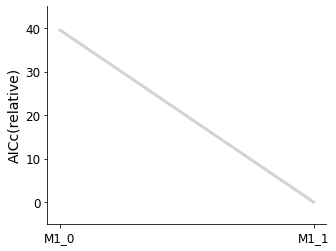

In [14]:
pvs.plot_selected_models(
    selected_models=best_models,
    criterion=Criterion.AICC,
    labels=get_labels(best_models),
)

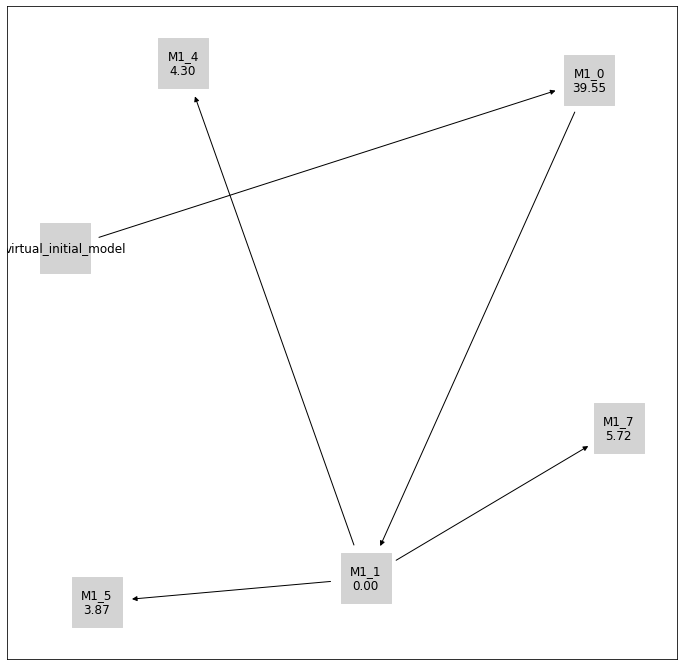

In [15]:
pvs.plot_history_digraph(
    problem=pypesto_select_problem_4,
    criterion=Criterion.AICC,
    relative=False,
    labels=get_digraph_labels(pypesto_select_problem_4.history.values(), criterion=Criterion.AICC),
)

# Multistart
Multiple model selections can be run by specifying initial models to be tested.

In [16]:
petab_select_problem.model_space.reset_exclusions()
pypesto_select_problem_5 = pypesto.select.Problem(petab_select_problem=petab_select_problem)

initial_model_1 = Model(
    model_id='myModel1',
    petab_yaml=petab_yaml,
    parameters=dict(
        k1=0,
        k2=0,
        k3=0,
    ),
    criteria={petab_select_problem.criterion: np.inf},
)

initial_model_2 = Model(
    model_id='myModel2',
    petab_yaml=petab_yaml,
    parameters=dict(
        k1=ESTIMATE,
        k2=ESTIMATE,
        k3=0,
    ),
    criteria={petab_select_problem.criterion: np.inf},
)

initial_models = [initial_model_1, initial_model_2]
best_model, best_models = pypesto_select_problem_5.multistart_select(
    method=Method.FORWARD,
    criterion=Criterion.AIC,
    predecessor_models=initial_models,
    minimize_options=minimize_options,
)

--------------------New Selection--------------------
--------------------New Selection--------------------
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Predecessor model ID	Model ID	Criterion ID	Predecessor model criterion	Model criterion	Criterion difference	Accept
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
100%|██████████| 1/1 [00:00<00:00,  2.59it/s]
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	649bcd92d8da15883a6709f3233e277e173aa6ce7ff1eda3f32d342a0f3a0e63ddd6e3764eab0c730dfb96440bab731ee67d412295a48e1e9949b3cc10935f28	Criterion.AIC	-4.175	inf	-inf	True
9202aceb387014e83f48a27e577758cd84f682df40dc52b5e79c99b150a27cc997276b7584be893fc59723e1eaa10dff9ba2bc0da53404996fa886aefdc08812	649bcd92d8da15883a6709f3233e277e173aa6ce7ff1ed

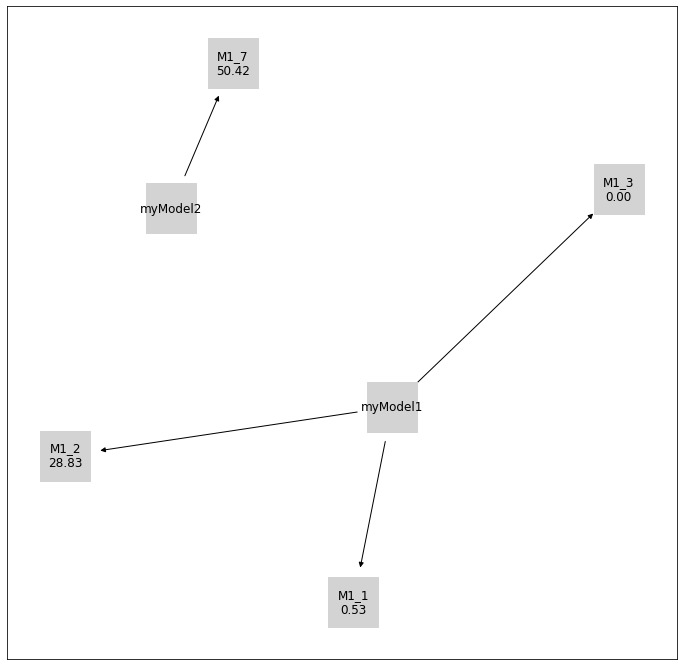

In [17]:
initial_model_labels = {
    initial_model.get_hash(): initial_model.model_id
    for initial_model in initial_models
}

pvs.plot_history_digraph(
    problem=pypesto_select_problem_5,
    criterion=Criterion.AIC,
    relative=False,
    labels={
        **get_digraph_labels(pypesto_select_problem_5.history.values(), criterion=Criterion.AICC),
        **initial_model_labels,
    },
)